![](../input/cover.png)

# Natural Language Processing (NLP)
### Luis Andrade




In [2]:
import warnings
import os

warnings.filterwarnings('ignore')
WORK_DIR = ["..", "input", "nlp-tutorial"] # files needed to run the notebook
DATA_DIR = ["..", "input", "word2vec-nlp-tutorial"]# contains the dataset from the bag of popcorn
# get this dataset from Kaggle at https://www.kaggle.com/c/word2vec-nlp-tutorial

## Contents
1. Introduction
2. Preprocessing
3. Feature Extraction
    * Bag of Words
    * TF-IDF
    * Word Embeddings
3. Text Classification Example
4. Conclusions

### Objective
By the end of this session, participants will be able to understand basic NLP techniques 



### Introduction
* NLP is an area of computer science and AI concerned with the interactions between computers and human (natural) languages
* Most of human knlowledge is actually in the form of raw unstructured text.
* Learning how to process this information can thus greatly increase the insights that can be generated from data

<img src="../input/nlp-tutorial/natural-Language-processing.PNG" alt="drawing" width="400px"/>

Some of the main tasks and areas of research of NLP are:

- Machine translation
- Named entity recognition
- Chatbots \ Question answering
- Text to speech
- Relation extraction
- Text generation
- Sentiment Analysis

#### Machine Learning with Text



<img src="../input/text_ml_workflow.png"/>



#### Jargon
Corpora - A set of documents
   - English languange, Portuguese...
    
Lexicon- Words and their meanings
   - Investing jargon vs regular english speak (Bull, Bear...) 

[Token](https://en.wikipedia.org/wiki/Lexical_analysis#Token) - String with an assigned and thus identified meaning
   - Keywords, separators, literals...

Stopwords - Most common words in a language

In [3]:
!pip freeze

absl-py==0.7.1
alabaster==0.7.10
alembic==1.0.9
algopy==0.5.7
altair==2.4.1
anaconda-client==1.6.14
anaconda-navigator==1.8.7
anaconda-project==0.8.2
annoy==1.15.2
appdirs==1.4.3
arrow==0.13.1
asn1crypto==0.24.0
astor==0.7.1
astroid==1.6.3
astropy==3.0.2
attrs==18.1.0
audioread==2.1.6
Babel==2.5.3
backcall==0.1.0
backports.shutil-get-terminal-size==1.0.0
Baker==1.3
basemap==1.2.0
bayesian-optimization==1.0.1
bayespy==0.5.18
bcolz==1.2.1
beautifulsoup4==4.6.0
biopython==1.73
bitarray==0.8.1
bkcharts==0.2
blaze==0.11.3
bleach==2.1.3
blis==0.2.4
blist==1.3.6
bokeh==1.1.0
Boruta==0.1.5
boto==2.48.0
boto3==1.9.134
botocore==1.12.134
Bottleneck==1.2.1
-e git+https://github.com/SohierDane/BigQuery_Helper@8615a7f6c1663e7f2d48aa2b32c2dbcb600a440f#egg=bq_helper
branca==0.3.1
brewer2mpl==1.4.1
bz2file==0.98
cachetools==3.1.0
cairocffi===file-.cairocffi-VERSION
CairoSVG==2.3.1
Cartopy==0.17.0
catboost==0.14.2
category-encoders==1.3.0
certifi==2019.3.9
cesium==0.9.9
cffi==1.11.5
chainer==5.4.0
chai

In [4]:
# Using nltk (Natural Language Tool Kit) library 
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
print(stopwords.words("portuguese"))

['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos

In [6]:
import numpy as np
import pandas as pd
import pickle

In [7]:
# Toy dataset
text = "I want chocolate, preferably dark chocolate"
text2 = "I need chocolate because if I do not have chocolate I will cry"
text3 = "please give me chocolate... PLEASE!!!"
text_list = [text, text2, text3]
text_list

['I want chocolate, preferably dark chocolate',
 'I need chocolate because if I do not have chocolate I will cry',
 'please give me chocolate... PLEASE!!!']

### Preprocessing
Some common preprocessing tasks
* Stemming/lemmatizing
* Removing HTML markup
* Removing non-letters
* Converting words to lower case
* Removing stopwords

In [8]:
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

class StringPreprocessor():
    """
    Class to preprocess a string
    """
    def __init__(self, stop_words = ['english'], remove_non_letters = True, lowercase = True,
                 remove_html = True):
        self.stop_words = stop_words
        self.remove_non_letters = remove_non_letters
        self.lowercase = lowercase
        self.remove_html = remove_html
        
    def transform(self, text):
        if self.remove_html:
            # 1. Remove HTML markup
            text = BeautifulSoup(text).get_text()
    
        if self.remove_non_letters:
            # 2. Remove non-letters
            text = re.sub("[^a-zA-Z]"," ", text)
    
        if self.lowercase:
            # 3. Convert words to lower case 
            text = text.lower()
     
        if stop_words is not None:
            # 4. Remove Stopwords
            text_list = [word for word in text.split() if word not in stop_words]
            text = " ".join(text_list)
    
        # 5. Return the processed string
        return(text)

In [9]:
# Use the StringPreprocessing class to clean the sentences 
processor = StringPreprocessor()
clean_text_list = [processor.transform(text) for text in text_list]
for raw, clean in zip(text_list, clean_text_list):
    print("{} --> {}".format(raw, clean))

I want chocolate, preferably dark chocolate --> want chocolate preferably dark chocolate
I need chocolate because if I do not have chocolate I will cry --> need chocolate chocolate cry
please give me chocolate... PLEASE!!! --> please give chocolate please


#### Stemming 
* For grammatical reasons, documents use different forms of a word
* Goal of stemming and lemmatizing is to reduce inflectional forms of a word to a common base form
    - take the root stem of the word
    - Operates on a single word
    


In [10]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()
for word in ["ride", "riding", "rode", "chocolates", "cacti", "laziness"]:
    print("{} --> {}".format(word, ps.stem(word)))

ride --> ride
riding --> ride
rode --> rode
chocolates --> chocol
cacti --> cacti
laziness --> lazi


#### Lemmatizing
* Lemma - dictionary form
* Unlike stemming, lemmatisation depends on correctly identifying the intended part of speech and meaning of a word in a sentence
* Result is a real word

In [11]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

for word in ["ride", "riding", "rode"]: 
    print("{} --> {}".format(word, lemmatizer.lemmatize(word, pos = "v"))) #Pos indicates part of speech
    
for word in ["chocolates", "cacti"]:
    print("{} --> {}".format(word, lemmatizer.lemmatize(word, pos = "n")))# default is noun (n)
    
print("{} --> {}".format("laziness", lemmatizer.lemmatize("laziness", pos = "a")))# adjectives

ride --> ride
riding --> rid
rode --> ride
chocolates --> chocolate
cacti --> cactus
laziness --> laziness


## Feature Extraction

### Bag of Words
* A simple representation of word vectors
* Text is represented as the number of occurencies of each word
* Disregards grammar and word order

This model can be implemented in Python with Sklearn's [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) class. 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
# Initiate a CountVectorizer object
vectorizer = CountVectorizer()
print(vectorizer)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [13]:
# Create a dictionary from the text
vectorizer.fit(clean_text_list)
print(clean_text_list, "\n")
print(vectorizer.get_feature_names())

['want chocolate preferably dark chocolate', 'need chocolate chocolate cry', 'please give chocolate please'] 

['chocolate', 'cry', 'dark', 'give', 'need', 'please', 'preferably', 'want']


In [14]:
# Transform the train text into a document term matrix
text_dtm = vectorizer.transform(clean_text_list)
print(type(text_dtm))
print(text_dtm)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 0)	2
  (0, 2)	1
  (0, 6)	1
  (0, 7)	1
  (1, 0)	2
  (1, 1)	1
  (1, 4)	1
  (2, 0)	1
  (2, 3)	1
  (2, 5)	2


In [15]:
# Create a dense matrix from the sparse matrix
dense_mat = text_dtm.toarray()
pd.DataFrame(dense_mat, columns = vectorizer.get_feature_names())

,chocolate,cry,dark,give,need,please,preferably,want
0,2,0,1,0,0,0,1,1
1,2,1,0,0,1,0,0,0
2,1,0,0,1,0,2,0,0


Using this approach features and samples are defined as follows:
* Feature - Each Individual token occurence frequency
* Sample (or document) - The vector of all features for a given document

A corpus of documents can be represented by a matrix whith a single row per document and a single column per token that occurrs in the corpus. 

In order to make a prediction, it is necessary that the new observation has the same features as the trainning observation
* Both in number and in meaning

Let's consider the Wikipedia page for "chocolate"

In [16]:
# Using the model to transform new data
import wikipedia

def get_wikipedia_page(page_name):
    try:
        page =  wikipedia.page(page_name).content
        with open(os.path.join(*WORK_DIR, "wikipediaPage.pkl"), "wb") as fp:
            pickle.dump(page, fp)
    except Exception:
        with open(os.path.join(*WORK_DIR, "wikipediaPage.pkl"), "rb") as fp:
            page = pickle.load(fp)
    return page

wikipedia_chocolate = get_wikipedia_page("chocolate")

# Transform documents using the vectorizer
test_dtm = vectorizer.transform([wikipedia_chocolate])

# Output a pandas dataframe
vocab_df = pd.DataFrame(test_dtm.toarray(), columns = vectorizer.get_feature_names())
vocab_df

,chocolate,cry,dark,give,need,please,preferably,want
0,301,0,18,1,2,0,0,0


### N-gram Model¶

This model preserves some local ordering information
* Considers N tokens in a row
* The features are the resulting N-grams


In [17]:
from nltk.util import ngrams
from nltk import word_tokenize

text_list_words = word_tokenize(" ".join(clean_text_list))[:10]
text_list_words

['want',
 'chocolate',
 'preferably',
 'dark',
 'chocolate',
 'need',
 'chocolate',
 'chocolate',
 'cry',
 'please']

In [18]:
# Unigrams
list(ngrams(text_list_words, 1))

[('want',),
 ('chocolate',),
 ('preferably',),
 ('dark',),
 ('chocolate',),
 ('need',),
 ('chocolate',),
 ('chocolate',),
 ('cry',),
 ('please',)]

In [19]:
# Bigrams
list(ngrams(text_list_words, 2))

[('want', 'chocolate'),
 ('chocolate', 'preferably'),
 ('preferably', 'dark'),
 ('dark', 'chocolate'),
 ('chocolate', 'need'),
 ('need', 'chocolate'),
 ('chocolate', 'chocolate'),
 ('chocolate', 'cry'),
 ('cry', 'please')]

In [20]:
# Trigrams
list(ngrams(text_list_words, 3))

[('want', 'chocolate', 'preferably'),
 ('chocolate', 'preferably', 'dark'),
 ('preferably', 'dark', 'chocolate'),
 ('dark', 'chocolate', 'need'),
 ('chocolate', 'need', 'chocolate'),
 ('need', 'chocolate', 'chocolate'),
 ('chocolate', 'chocolate', 'cry'),
 ('chocolate', 'cry', 'please')]

In [21]:
# Create a bigram model (N=2) using CountVectorizer's ngram_range
# ngram_range : tuple(min_N, max_N)

bigram_vectorizer = CountVectorizer(ngram_range = (2,2))
bigrams = bigram_vectorizer.fit_transform(clean_text_list)
pd.DataFrame(bigrams.toarray(),
             columns = bigram_vectorizer.get_feature_names())

,chocolate chocolate,chocolate cry,chocolate please,chocolate preferably,dark chocolate,give chocolate,need chocolate,please give,preferably dark,want chocolate
0,0,0,0,1,1,0,0,0,1,1
1,1,1,0,0,0,0,1,0,0,0
2,0,0,1,0,0,1,0,1,0,0


In [22]:
from collections import Counter, OrderedDict

def build_vocabulary(text_):
    vocabulary = Counter()

    for doc in text_:
        words = doc.split()
        vocabulary.update(words)
    
    return OrderedDict(vocabulary.most_common())

# turn into a list of tuples and get the first 10 items
top_words = list(build_vocabulary(clean_text_list).items())
top_words[:10]

[('chocolate', 5),
 ('please', 2),
 ('want', 1),
 ('preferably', 1),
 ('dark', 1),
 ('need', 1),
 ('cry', 1),
 ('give', 1)]

In [23]:
top_words = list(build_vocabulary(wikipedia_chocolate.split()).items())
top_words[:10]

[('the', 332),
 ('of', 238),
 ('and', 220),
 ('chocolate', 182),
 ('to', 150),
 ('in', 142),
 ('a', 130),
 ('is', 118),
 ('cocoa', 79),
 ('as', 78)]

## TF-IDF
Term Frequency - Inverse Document Frequency
* Numerical statistic reflecting how important a token is to a document
* Often used as weighting factor
    * Information retrieval
    * Text mining
    
Term Frequency = Bag of Words

Inverse Document Frequency 
* Measure of how much information a term provides
    * Whether a term is common or rare across documents 
    
* Logarithmically scaled inverse fraction of documents that contain the token
<img src="../input/idf.png" alt="text" width="250px"/>

where
* nd : number of documents in the corpus 
* df(d,t) : the number of documents d where token t appears 

Variations  
* Scikit Learn's
<img src="../input/idf2.png" alt="text" width="300px"/>
* [Other variations of tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)
 

Tf-Idf is the product of term frequency tf(t,d) and inverse document frequency

<img src="../input/tfidf.png" alt="text" width="300px"/>
 * Can be easily built using the [TdfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) class from sklearn


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate a tf-idf vectorizer class
tf_idf = TfidfVectorizer(norm = None)
tf_idf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=None, preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [25]:
# learn the vocabulary from the corpus of documents
fitted = tf_idf.fit(text_list)
print(fitted.get_feature_names())

['because', 'chocolate', 'cry', 'dark', 'do', 'give', 'have', 'if', 'me', 'need', 'not', 'please', 'preferably', 'want', 'will']


In [26]:
# transform the documents using the learned vocabulary
transformed = tf_idf.transform(text_list)
pd.DataFrame(transformed.toarray(), columns = fitted.get_feature_names())

,because,chocolate,cry,dark,do,give,have,if,me,need,not,please,preferably,want,will
0,0.000000,2.0,0.000000,1.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.693147,1.693147,0.000000
1,1.693147,2.0,1.693147,0.000000,1.693147,0.000000,1.693147,1.693147,0.000000,1.693147,1.693147,0.000000,0.000000,0.000000,1.693147
2,0.000000,1.0,0.000000,0.000000,0.000000,1.693147,0.000000,0.000000,1.693147,0.000000,0.000000,3.386294,0.000000,0.000000,0.000000


In [27]:
# vectorize the test documents
test = tf_idf.transform([wikipedia_chocolate])
pd.DataFrame(test.toarray(), columns = fitted.get_feature_names())

,because,chocolate,cry,dark,do,give,have,if,me,need,not,please,preferably,want,will
0,11.85203,301.0,0.0,30.476649,1.693147,1.693147,42.32868,18.624619,0.0,3.386294,23.704061,0.0,0.0,0.0,15.238325


## Word Embeddings
* Word vectors with arbitrary size
* "You shall know a word by the company it keeps"- John Firth


### Word2Vec 
Generic name for a group models used to produce word embeddings
* Two-layer [neural networks](https://en.wikipedia.org/wiki/Neural_network) trained to reconstruct linguistic contexts of words
<img src = "deep-neural-networks.png" alt="50px" width="300"/>
* Resulting word vectors are positioned in the vector space such that the words wich share similar contexts are closer
<img src = "../input/word2vec_graph2.png"width="500">

* Two types of Word2Vec
    - **CBOW** (continuous bag of words): context words are input words, predicts middle word
    - **Skip-gram**: context words are input words, predicts middle word   
    
<img src="../input/word2vec.png" width="400">

* Algorithm relies on the broader context of the sentence 
    * To **train Word2Vec** it is better **not to remove stop words**
    
Since Word2Vec requires meaningfull context in order to train itself, we need a more informative corpus

#### IMDB Movie Review Dataset
A dataset containing various IMDB movie reviews
* Some labeled as positive or negative

In [28]:
# Read data from files 
labeled = pd.read_csv(os.path.join(*DATA_DIR, "labeledTrainData.tsv"), header=0,
                                   delimiter = "\t", quoting=3 )
unlabeled1 = pd.read_csv(os.path.join(*DATA_DIR,"unlabeledTrainData.tsv"), header=0,
                                      delimiter="\t", quoting=3 )
unlabeled2 = pd.read_csv(os.path.join(*DATA_DIR,"testData.tsv"), header=0,
                                      delimiter="\t", quoting=3 )

# Verify the number of reviews that were read (100,000 in total)
print( "Read %d labeled reviews, %d unlabeled reviews, " \
       % (labeled["review"].size, unlabeled1["review"].size + unlabeled2["review"].size ))

Read 25000 labeled reviews, 75000 unlabeled reviews, 


In [29]:
labeled.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [30]:
unlabeled1.head()

,id,review
0,"""9999_0""","""Watching Time Chasers, it obvious that it was..."
1,"""45057_0""","""I saw this film about 20 years ago and rememb..."
2,"""15561_0""","""Minor Spoilers<br /><br />In New York, Joan B..."
3,"""7161_0""","""I went to see this film with a great deal of ..."
4,"""43971_0""","""Yes, I agree with everyone on this site this ..."


In [33]:
processor = StringPreprocessor(stop_words = None)
    
def review_to_wordlist(review):
    # Function to convert a document to a sequence of clean words
    # Returns a list of words.
    return processor.transform(review).split()

Word2Vec expects single sentences, each one as a list of words. In other words, the input format is a list of lists.

In [34]:
from nltk import sent_tokenize

raw_sentences = []
parsed_sentences = []

for review in unlabeled1['review']:
    for raw_sent in sent_tokenize(review):
        if len(raw_sent) > 0:
            parsed_sentences.append(review_to_wordlist(raw_sent))

for review in unlabeled2['review']:
    for raw_sent in sent_tokenize(review):
        if len(raw_sent) > 0:
            parsed_sentences.append(review_to_wordlist(raw_sent))

print(len(parsed_sentences))
print(parsed_sentences[0])

790387
['watching', 'time', 'chasers', 'obvious', 'made', 'bunch', 'friends']


In [35]:
import logging
from gensim.models.word2vec import Word2Vec
from gensim.models import word2vec

# Parameters
num_features = 300    # Word vector dimensionality
min_word_count = 1    # Minimum word count
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train model

print("Training model...")
model = word2vec.Word2Vec(parsed_sentences, workers = num_workers,
                         size = num_features, min_count = min_word_count,
                         window = context, sample = downsampling)

# If you dont plan to train the model any further, calling
# init_sims will make the model much more memory-efficient
model.init_sims(replace = True)

# Save the model for later use
model_name = os.path.join(*WORK_DIR, "300features_40minwords_10context")
#model.save(model_name)

Training model...


In [36]:
#model = word2vec.Word2Vec.load(os.path.join(*WORK_DIR,"300features_40minwords_10context"))
print(type(model.wv.vectors))
print(model.wv.vectors.shape)

<class 'numpy.ndarray'>
(123108, 300)


In [37]:
model.wv["man"] # 1x300 vector for the word chocolate

array([ 0.02191224, -0.07176597, -0.08337215, -0.08745411, -0.00603131,
       -0.01633377,  0.00260495, -0.02695936,  0.13501741,  0.11807814,
        0.0753293 ,  0.04737786,  0.01636401,  0.10520995, -0.01915731,
       -0.03689175, -0.03935427, -0.11523633, -0.06313929,  0.10672546,
        0.00467127,  0.00455517,  0.02942248, -0.01188637,  0.10578116,
       -0.00773956, -0.00547364,  0.05864438, -0.03065966,  0.04471742,
       -0.0367077 , -0.0216258 ,  0.07850206, -0.01806192,  0.10437661,
        0.13524343, -0.01448595, -0.109548  ,  0.00631913,  0.03961938,
        0.01114636, -0.03281092,  0.00705066, -0.02113591, -0.04905528,
       -0.06769491,  0.0088134 , -0.01092065,  0.01787014, -0.04426682,
        0.01955673, -0.00578235, -0.04453442,  0.04205176,  0.12944885,
        0.08031043,  0.01869845,  0.0452925 ,  0.07538796, -0.06775737,
        0.01313041, -0.01099126, -0.03939977,  0.05224431, -0.01379691,
        0.0196141 , -0.06563295, -0.019418  , -0.0062966 , -0.07

In [38]:
model.wv.most_similar("man")

[('men', 0.5813634395599365),
 ('woman', 0.5462287664413452),
 ('lady', 0.5426381826400757),
 ('hankers', 0.4927685856819153),
 ('lad', 0.49059078097343445),
 ('guy', 0.4617379903793335),
 ('roids', 0.45926034450531006),
 ('prurima', 0.44982630014419556),
 ('meekest', 0.44871950149536133),
 ('chap', 0.43787145614624023)]

In [39]:
model.wv.doesnt_match("man woman child kitchen".split())

'kitchen'

In [40]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

Learn more about this powerfull model in the [here](https://radimrehurek.com/gensim/models/word2vec.html)

## Classifying Text
The Multinomial Naive Bayes classifier is often used for text classification
    * Implements the naive Bayes algorithm for multinomially distributed data
    * [MultinomialNB](https://scikit\-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB) 

In [41]:
def compare_models(X, y, models, K = 10):
    '''
    Classifies the blocks using different ML algorithms 
    so that they can be compared in terms of accuracy
    '''
    from time import time
    
    print(X.shape)
    print(y.shape)

    entries = []
    
    for model in models:
        start_time = time()
        model_name = " ".join(model.named_steps.keys())
        accuracies = cross_val_score(model, X, y, cv =K)
        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((model_name, fold_idx, accuracy))
        end_time = time()
        time_taken = end_time - start_time
        msg = "{} took {}s to train and test over {}-fold validation"
        print(msg.format(model_name, time_taken, K))
    
    # Create a pandas dataframe with all the sores and model names
    cv_df = pd.DataFrame(entries, index = range(K * len(models)),
                         columns = ['model_name', 'fold_idx', 'accuracy'])
    return cv_df

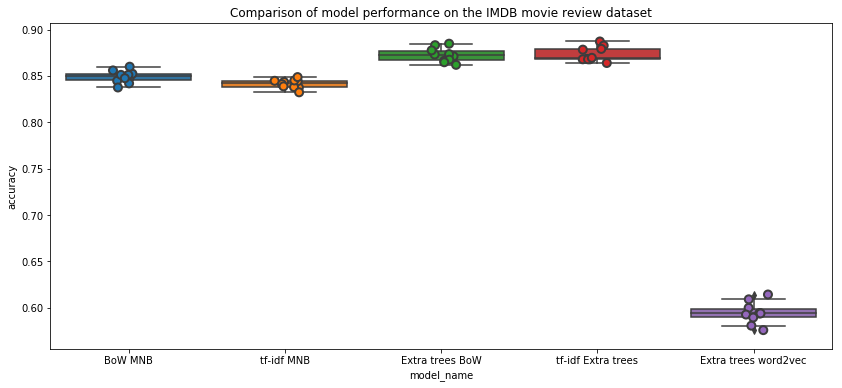

In [42]:
%matplotlib inline 

out_of_time = True # If running out of time

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (14, 6))

w2v = dict(zip(model.wv.index2word, model.wv.vectors))
X = labeled["review"]
y = labeled["sentiment"]

bow_MNB = Pipeline([
    ("BoW", vectorizer),
    ("MNB", MultinomialNB())])
tfidf_MNB = Pipeline([
    ("tf-idf", tf_idf),
    ("MNB", MultinomialNB())])
bow_etrees = Pipeline([
    ("BoW", vectorizer),
    ("Extra trees",ExtraTreesClassifier(n_estimators=200))])
tfidf_etrees = Pipeline([
    ("tf-idf", tf_idf),
    ("Extra trees",ExtraTreesClassifier(n_estimators=200))])
w2v_etrees = Pipeline([
    ("word2vec", MeanEmbeddingVectorizer(w2v)),
    ("Extra trees", ExtraTreesClassifier(n_estimators=200))])

from sklearn.model_selection import cross_val_score
K = 10 # Number of folds in a (Stratified)KFold

models = [bow_MNB, tfidf_MNB, bow_etrees, tfidf_etrees, w2v_etrees]

if not out_of_time:
    cv_df = compare_models(X, y, models, K)
    with open(os.path.join(*WORK_DIR,"cv_df.pkl"), "wb") as fp:
        pickle.dump(cv_df, fp)
else:
    with open(os.path.join(*WORK_DIR,"cv_df.pkl"), "rb") as fp:
        cv_df = pickle.load(fp)
        
# Creates a boxplot
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

plt.title("Comparison of model performance on the IMDB movie review dataset")
plt.show()




#### Remarks
The performance of the classifier will be impacted by all aspects discussed so far
* Preprocessing
* Feature extraction
* Model used

## Conclusions

* Preprocessing usefull to clean text
* Features must be extracted from text
    1. Learn the vocabulary  
    2. Project the input tokens into the vocabulary space 
* Bag of Words uses term frequency
    * Very simple, yet achieves good results
* Tf-Idf weights the term frequenies by the inverse document frequencies
* Word2Vec creates an N-dimensional vector space to embedd contextual meaning


## Further Reading

Not cevered:
* [Regular Expressions](https://en.wikipedia.org/wiki/Regular_expression)
* [Part of speech tagging](https://en.wikipedia.org/wiki/Part-of-speech_tagging)
* [Context-free grammar](https://en.wikipedia.org/wiki/Context-free_grammar)

Some interesting links 

* [Lexical analysis](https://en.wikipedia.org/wiki/Lexical_analysis)
* Interesting comparison between the usage of [Euclidean and Cosine distance](https://cmry.github.io/notes/euclidean-v-cosine) to determne the similarity between two documents

Text classification:
* Read Paul Graham's classic post, [A Plan for Spam](http://www.paulgraham.com/spam.html), for an overview of a basic text classification system using a Bayesian approach. (He also wrote a [follow-up post](http://www.paulgraham.com/better.html) about how he improved his spam filter.)
* [Automatically Categorizing Yelp Businesses](https://engineeringblog.yelp.com/2015/09/automatically-categorizing-yelp-businesses.html) discusses how Yelp uses NLP and scikit-learn to solve the problem of uncategorized businesses.
* [How to Read the Mind of a Supreme Court Justice](https://fivethirtyeight.com/features/how-to-read-the-mind-of-a-supreme-court-justice/) discusses CourtCast, a machine learning model that predicts the outcome of Supreme Court cases using text-based features only. (The CourtCast creator wrote a [post explaining how it works](https://sciencecowboy.wordpress.com/2015/03/05/predicting-the-supreme-court-from-oral-arguments/), and the Python code is available on GitHub.)
* [Identifying Humorous Cartoon Captions](http://www.cs.huji.ac.il/~dshahaf/pHumor.pdf) is a readable paper about identifying funny captions submitted to the New Yorker Caption Contest.
* In this [PyData video](https://www.youtube.com/watch?v=y3ZTKFZ-1QQ) (50 minutes), Facebook explains how they use scikit-learn for sentiment classification by training a Naive Bayes model on emoji-labeled data.

